# Laboratorio 1: Conceptos básicos de aprendizaje automático

### IRIS Set

In [1]:
# Requiere la carpeta de scripts ml
%matplotlib inline
# Auxiliary
from aux_func import *

## Clasificación multiclase

### Carga de datos

## Clasificación multiclase

Ahora veremos clasificación binaria. Muy similar al caso anterior, con la diferencia de que en este caso hay más de dos etiquetas posibles para clasificación. La metodología en sí es muy similar al caso anterior, con la diferencia de que se utilizará el método `one-vs-all` (o también `one-vs-rest`) para hacer posible la clasificaicón.

Una vez más tenemos que decidir dos features para poder visualizar los modelos.

### Carga de datos

In [2]:
iris_data = load_iris()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(150)
shuff_train = shuff_data[:120]
shuff_val = shuff_data[120:]

X_train = iris_data['data'][shuff_train]
X_val = iris_data['data'][shuff_val]

y_train = iris_data['target'][shuff_train]
y_val = iris_data['target'][shuff_val]

feature_map = {feature: idx for idx, feature in enumerate(iris_data['feature_names'])}

print(iris_data['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
print("Listado de atributos\n====================")
for feature in iris_data['feature_names']:
    print("- %s" % feature)

Listado de atributos
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)


In [4]:
# Seleccionamos dos atributo de los listados en el apartado anterior, uno para el eje x y otro para el eje y
# TODO: Cambiar los atributos y ver como se modifica el resultado
#x_feature = 'sepal length (cm)'
#y_feature = 'sepal width (cm)'

x_feature = 'petal length (cm)'
y_feature = 'petal width (cm)'

x_feature_col = feature_map[x_feature]
y_feature_col = feature_map[y_feature]
X_train_feature = X_train[:, [x_feature_col, y_feature_col]]
X_val_feature = X_val[:, [x_feature_col, y_feature_col]]

### Regresión logística con atributos regulares

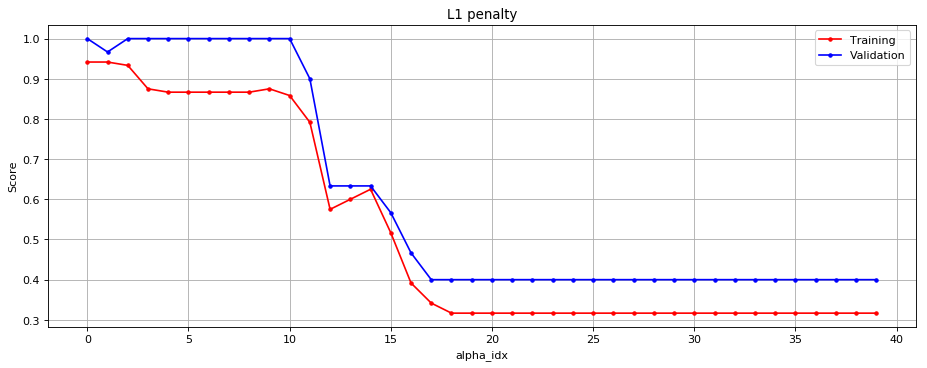

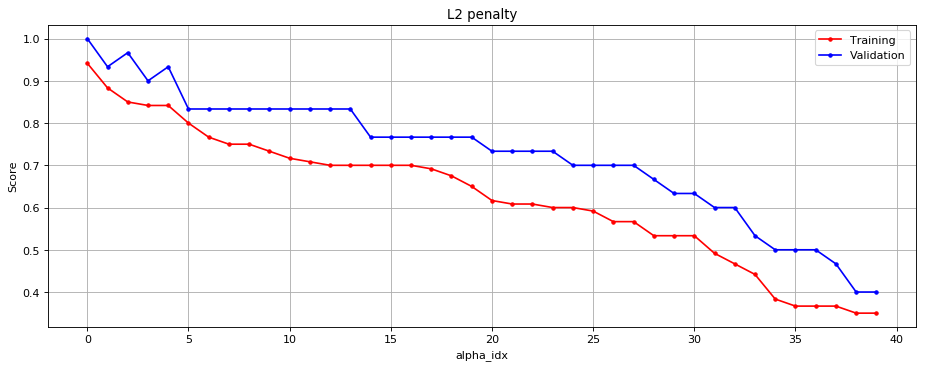

In [5]:
# Fijamos inicialmente el tipo de regularizacion/max_iter/tol
max_iter = 200000  # CONS: Cantidad máxima de iteraciones del algoritmo
tol = 0.0000001 # FIXED: Precisión del algoritmo (error mínimo entre una iteración y la siguiente)

# Estudiamos el efecto de diferentes ordenes
alpha_vec=list(np.arange(0.00001,40,1)); 
var_target_name='C'; var_target_vec=list(np.true_divide(1.0,alpha_vec))
var_target_name_aux='alpha'; var_target_vec_aux=alpha_vec

penalty = 'l1' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados)
model_spec=LogisticRegression(penalty=penalty, C=1.0, max_iter=max_iter, tol=tol, multi_class='ovr')

l1_iris_LR_dict,list_alpha_l1=acc_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

# Graficamos los errores    
xo_array=np.array(list_alpha_l1)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,1],xo_array[:,2],'.-r',xo_array[:,1],xo_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('alpha_idx')
plt.ylabel('Score')
plt.title('L1 penalty')
plt.legend(['Training','Validation'])
plt.show()

###############
penalty = 'l2' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados)
model_spec=LogisticRegression(penalty=penalty, C=1.0, max_iter=max_iter, tol=tol, multi_class='ovr')

l2_iris_LR_dict,list_alpha_l2=acc_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

# Graficamos los errores    
xo_array=np.array(list_alpha_l2)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,1],xo_array[:,2],'.-r',xo_array[:,1],xo_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('alpha_idx')
plt.ylabel('Score')
plt.title('L2 penalty')
plt.legend(['Training','Validation'])
plt.show()


#### Matriz de confusión

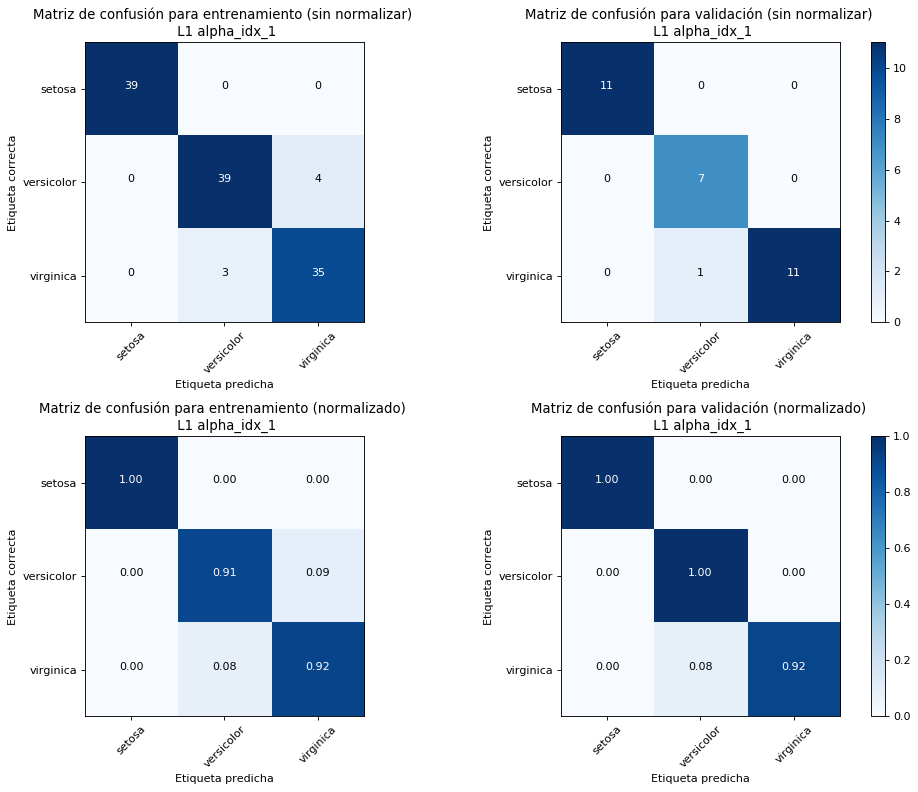

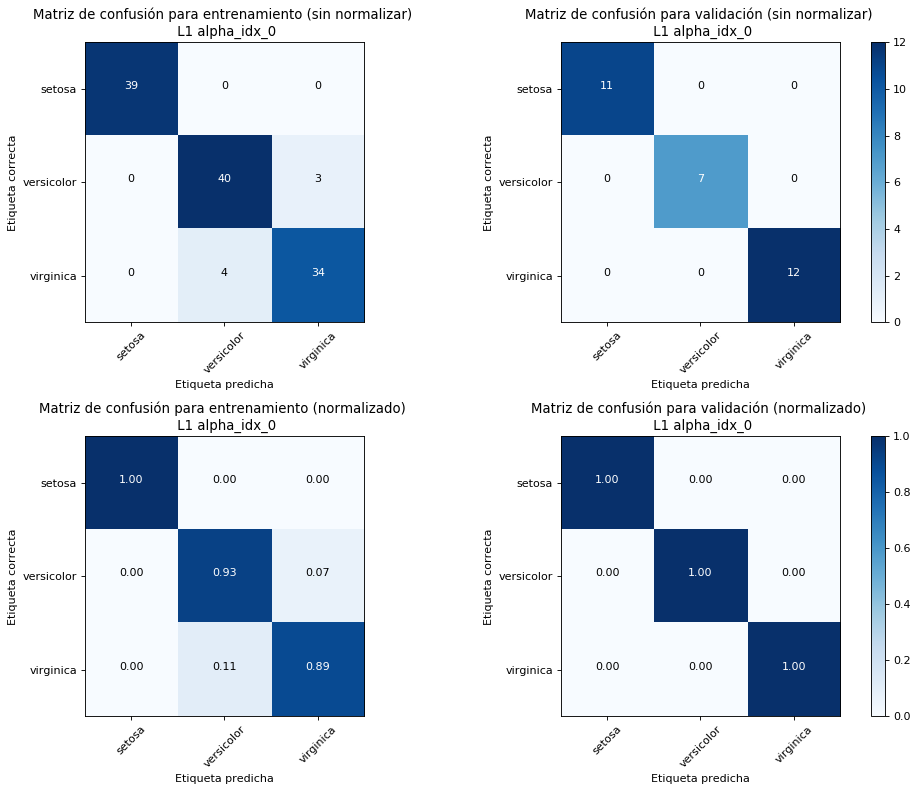

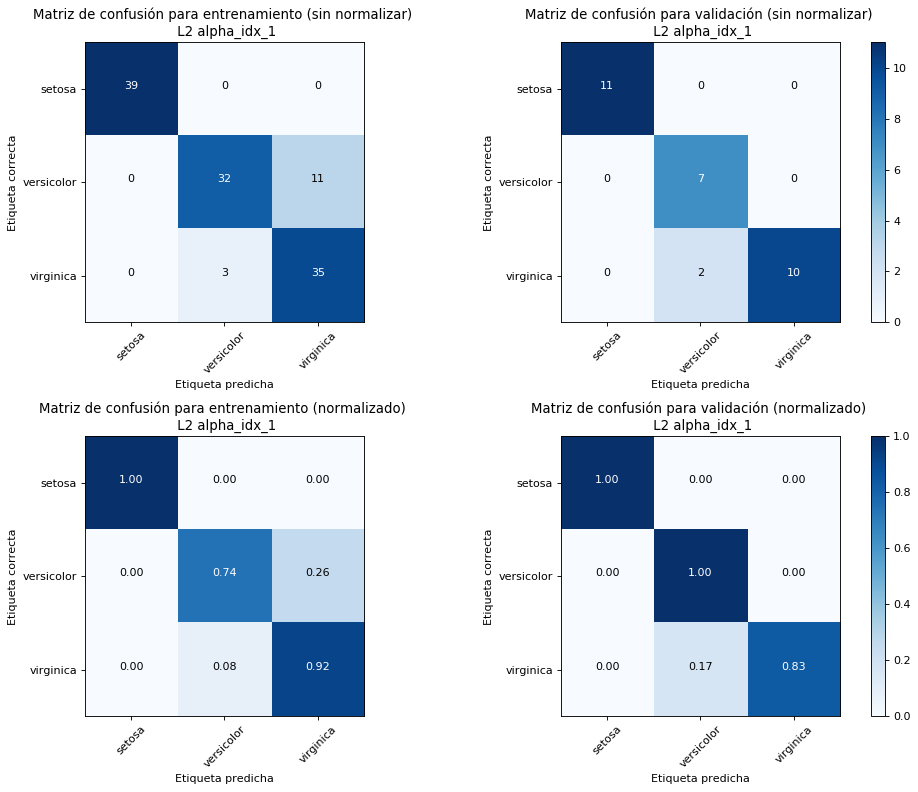

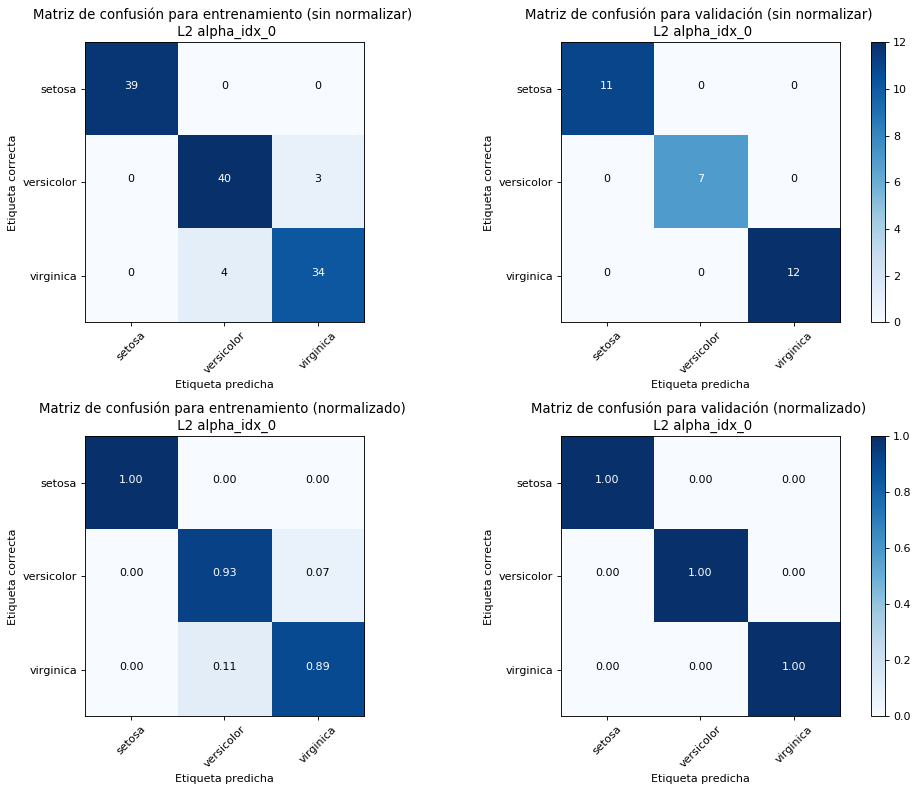

In [6]:
## L1
# alpha_idx_1
model=l1_iris_LR_dict['alpha_idx_1']['model']
mat_conf_plt(iris_data,model,X_train_feature,y_train,X_val_feature,y_val,[' \n L1 alpha_idx_1',' \n L1 alpha_idx_1',' \n L1 alpha_idx_1',' \n L1 alpha_idx_1'])

## Veamos otra eleccion de alpha
# alpha_idx_0
model=l1_iris_LR_dict['alpha_idx_0']['model']
mat_conf_plt(iris_data,model,X_train_feature,y_train,X_val_feature,y_val,[' \n L1 alpha_idx_0',' \n L1 alpha_idx_0',' \n L1 alpha_idx_0',' \n L1 alpha_idx_0'])

## L2
# alpha_idx_1
model=l2_iris_LR_dict['alpha_idx_1']['model']
mat_conf_plt(iris_data,model,X_train_feature,y_train,X_val_feature,y_val,[' \n L2 alpha_idx_1',' \n L2 alpha_idx_1',' \n L2 alpha_idx_1',' \n L2 alpha_idx_1'])

## Veamos otra eleccion de alpha
# alpha_idx_0
model=l2_iris_LR_dict['alpha_idx_0']['model']
mat_conf_plt(iris_data,model,X_train_feature,y_train,X_val_feature,y_val,[' \n L2 alpha_idx_0',' \n L2 alpha_idx_0',' \n L2 alpha_idx_0',' \n L2 alpha_idx_0'])


En las situaciones anteriores en general se observa que los valores de alpha que logran mejor clasificacion son los $\alpha\sim0$. No me queda claro si es un resultado esperable o es un error que vengo arrastrando....

#### Visualización de la frontera de decisión

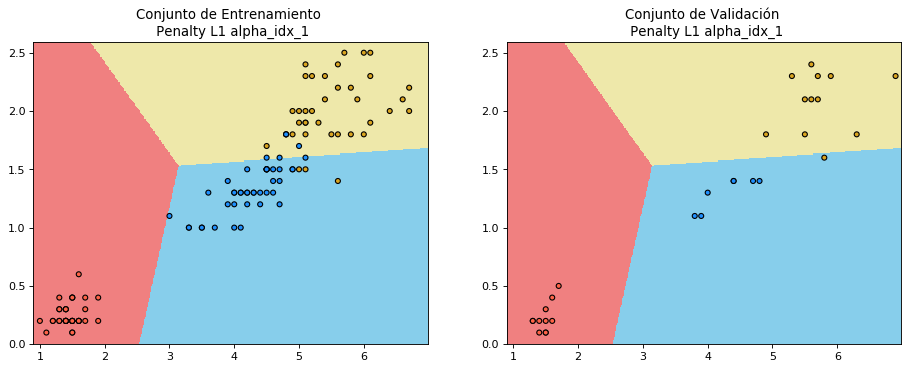

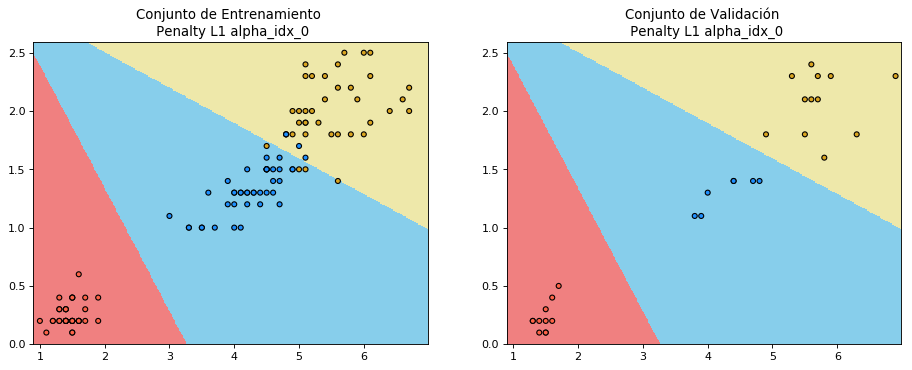

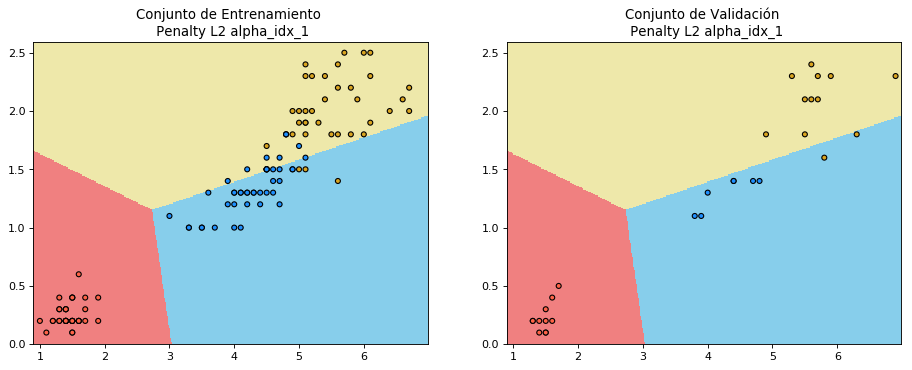

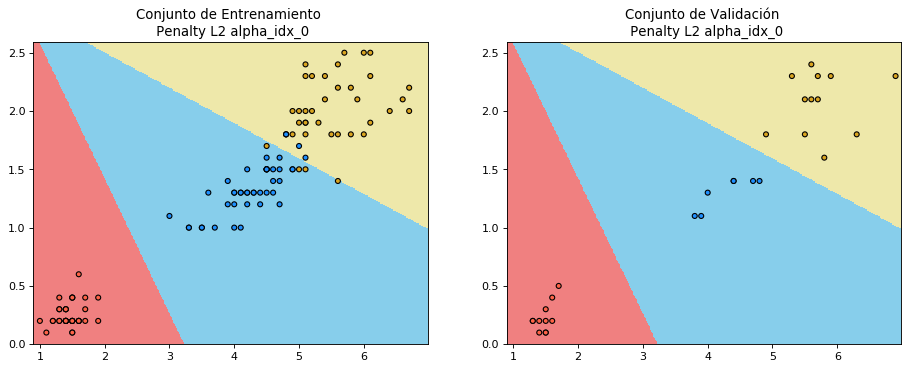

In [7]:
cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

# alpha_idx_1
model=l1_iris_LR_dict['alpha_idx_1']['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,[' \n Penalty L1 alpha_idx_1',' \n Penalty L1 alpha_idx_1'])

# alpha_idx_0
model=l1_iris_LR_dict['alpha_idx_0']['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,[' \n Penalty L1 alpha_idx_0',' \n Penalty L1 alpha_idx_0'])



# alpha_idx_1
model=l2_iris_LR_dict['alpha_idx_1']['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,[' \n Penalty L2 alpha_idx_1',' \n Penalty L2 alpha_idx_1'])


# alpha_idx_0
model=l2_iris_LR_dict['alpha_idx_0']['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,[' \n Penalty L2 alpha_idx_0',' \n Penalty L2 alpha_idx_0'])


Se ve ambas penalidades separan las regiones en forma similar.

### Regresión logística con atributos polinomiales

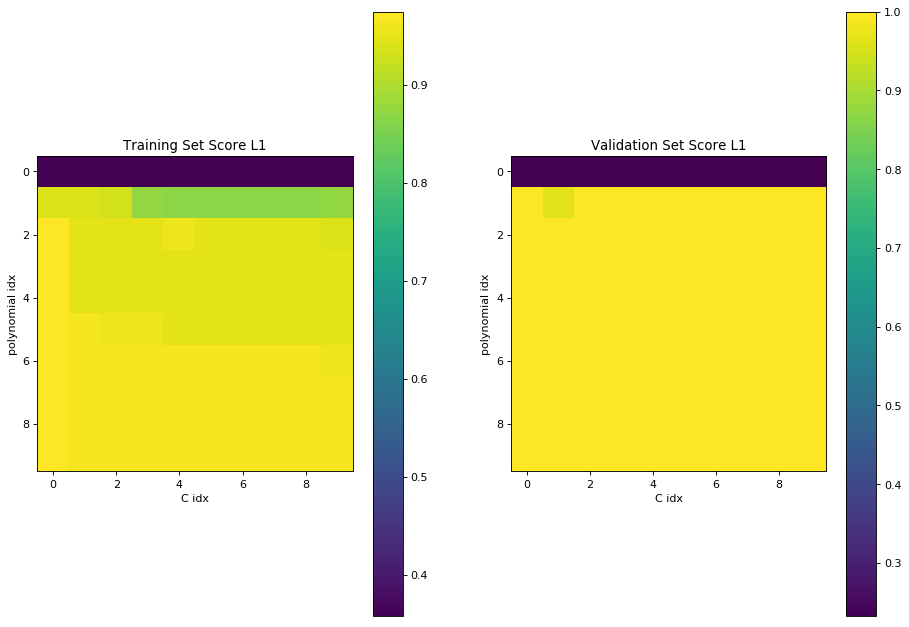

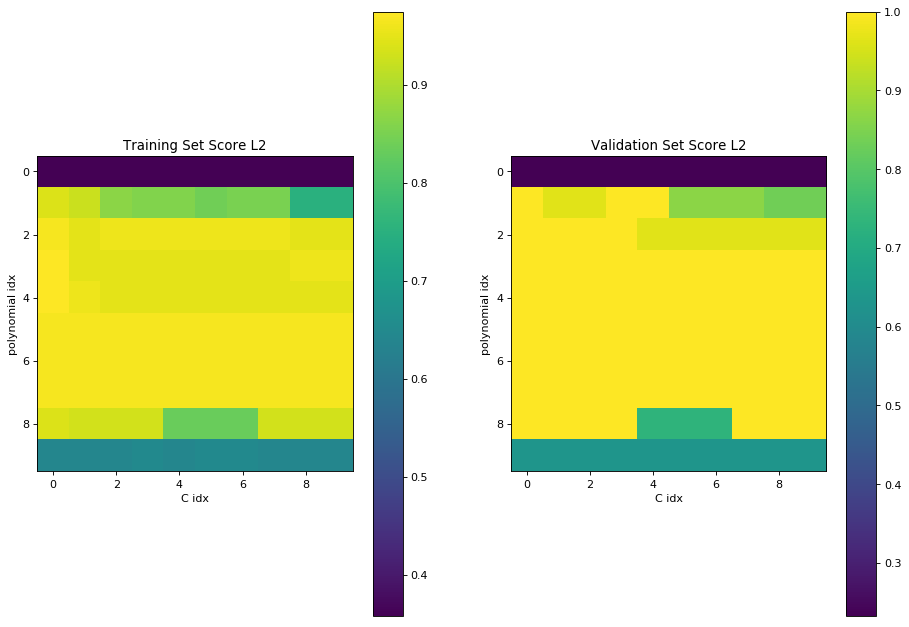

In [8]:

alpha_vec=list(np.arange(0.0001,10,1)); 
max_iter = 2000  # CONS: Cantidad máxima de iteraciones del algoritmo
tol = 0.0001 # FIXED: Precisión del algoritmo (error mínimo entre una iteración y la siguiente)


##### L1
penalty = 'l1' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados)

var_target_name='po'; var_target_vec=list(np.arange(0,10))
var_target_name_aux='C'; var_target_vec_aux=list(np.true_divide(1.0,alpha_vec))
model_spec=LogisticRegression(penalty=penalty, C=1.0, max_iter=max_iter, tol=tol,multi_class='ovr')

l1_LR_pol,l1_list_train_val,l1_list_val_val=acc_model_pol_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

matrix_train=np.array(l1_list_train_val);matrix_val=np.array(l1_list_val_val)
two_par_heatmap(matrix_train,matrix_val,'C idx','polynomial idx',['Training Set Score L1','Validation Set Score L1'])


##### L2
penalty = 'l2' # CONS: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados)

var_target_name='po'; var_target_vec=list(np.arange(0,10))
var_target_name_aux='C'; var_target_vec_aux=list(np.true_divide(1.0,alpha_vec))
model_spec=LogisticRegression(penalty=penalty, C=1.0, max_iter=max_iter, tol=tol,multi_class='ovr')

l2_LR_pol,l2_list_train_val,l2_list_val_val=acc_model_pol_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

matrix_train=np.array(l2_list_train_val);matrix_val=np.array(l2_list_val_val)
two_par_heatmap(matrix_train,matrix_val,'C idx','polynomial idx',['Training Set Score L2','Validation Set Score L2'])


#### Matriz de confusión

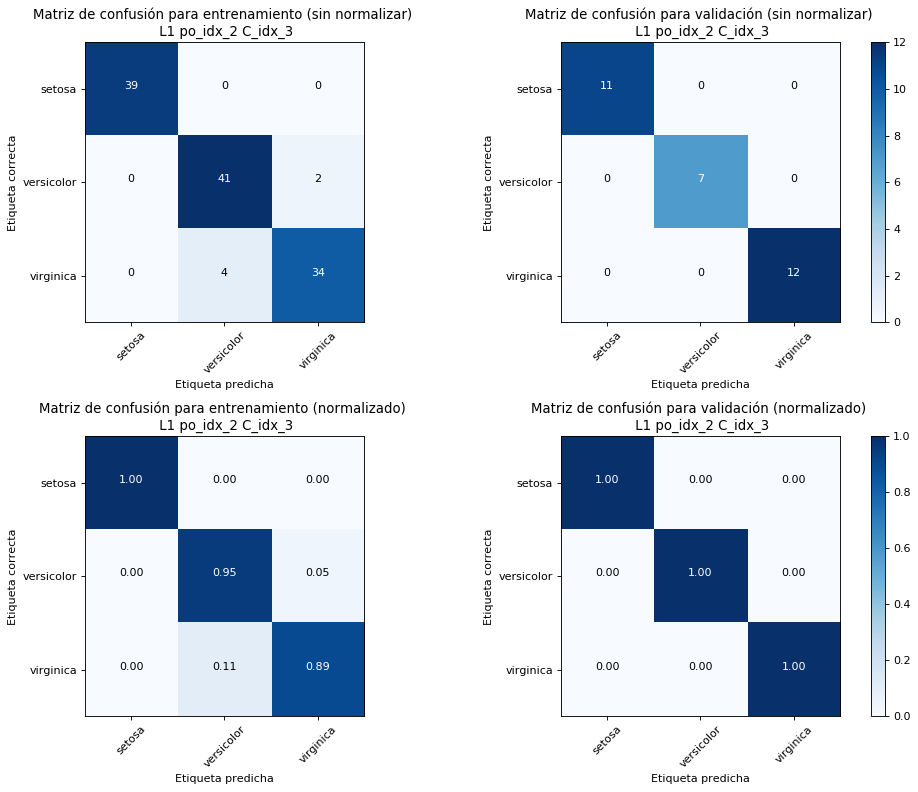

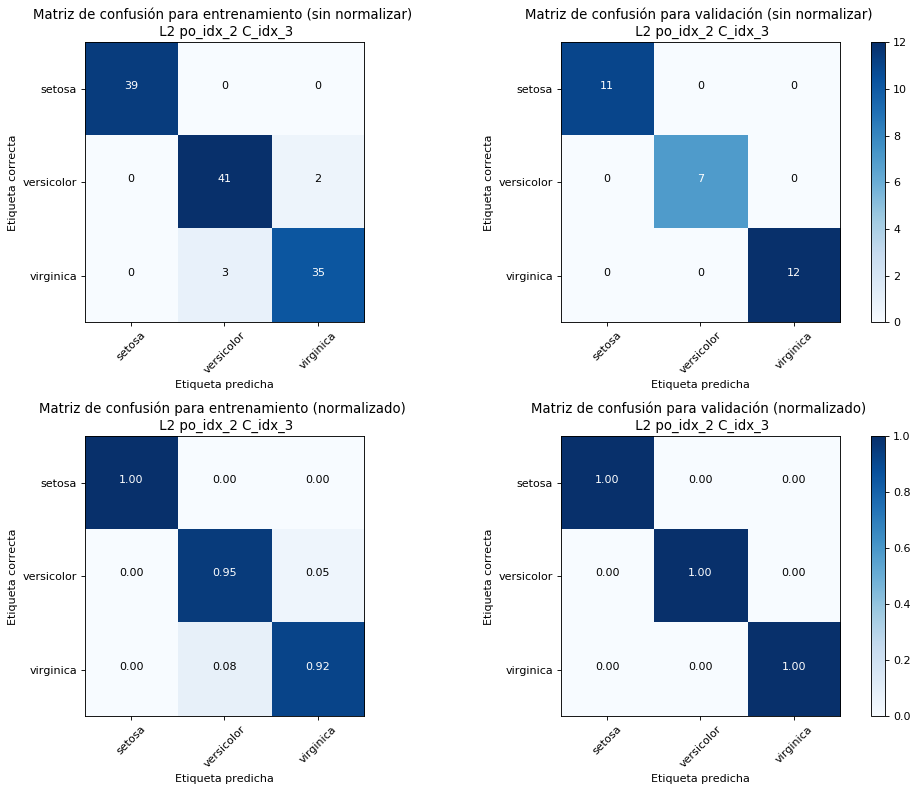

In [9]:
########## L1
case_var='po_idx_2';
case_aux='C_idx_3';
title_single=' \n L1 '+case_var +' ' +case_aux
title_list= [title_single,title_single,title_single,title_single]
model=l1_LR_pol[case_var][case_aux]['model']
poly_features=l1_LR_pol[case_var][case_aux]['poly_features']
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)
mat_conf_plt(iris_data,model,X_poly_train,y_train,X_poly_val,y_val,title_list)

########## L2
case_var='po_idx_2';
case_aux='C_idx_3';
title_single=' \n L2 '+case_var +' ' +case_aux
title_list= [title_single,title_single,title_single,title_single]
model=l2_LR_pol[case_var][case_aux]['model']
poly_features=l2_LR_pol[case_var][case_aux]['poly_features']
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)
mat_conf_plt(iris_data,model,X_poly_train,y_train,X_poly_val,y_val,title_list)





#### Visualización de la frontera de decisión

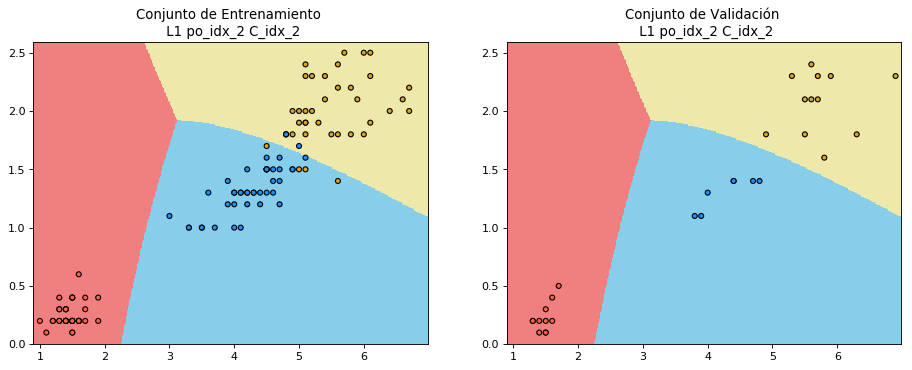

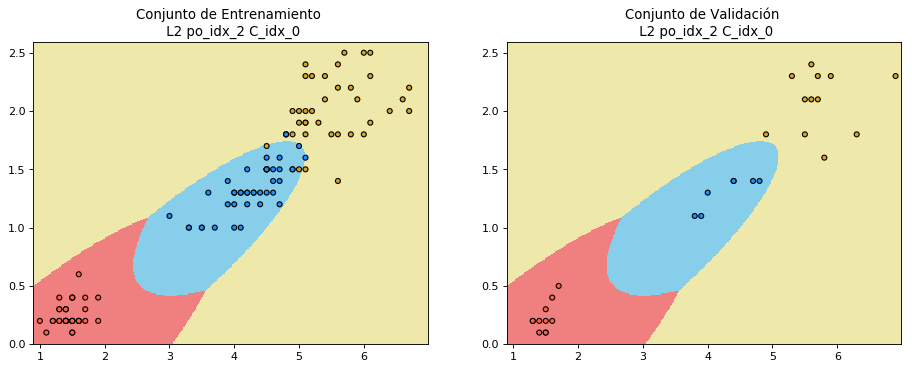

In [10]:
cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

########## L1
case_var='po_idx_2';
case_aux='C_idx_2';
title_single=' \n L1 '+case_var +' ' +case_aux
title_list= [title_single,title_single,title_single,title_single]
model=l1_LR_pol[case_var][case_aux]['model']
poly_features=l1_LR_pol[case_var][case_aux]['poly_features']
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)
boundary_pol_plt(model,X_train_feature,X_val_feature,y_train,y_val,poly_features,cmap_back,cmap_dots,title_list)

########## L2
case_var='po_idx_2';
case_aux='C_idx_0';
title_single=' \n L2 '+case_var +' ' +case_aux
title_list= [title_single,title_single,title_single,title_single]
model=l2_LR_pol[case_var][case_aux]['model']
poly_features=l2_LR_pol[case_var][case_aux]['poly_features']
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)
boundary_pol_plt(model,X_train_feature,X_val_feature,y_train,y_val,poly_features,cmap_back,cmap_dots,title_list)


### Vecinos más cercanos

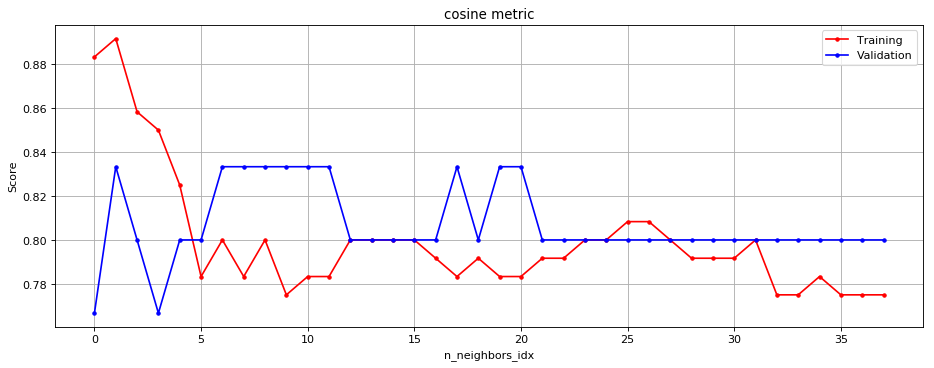

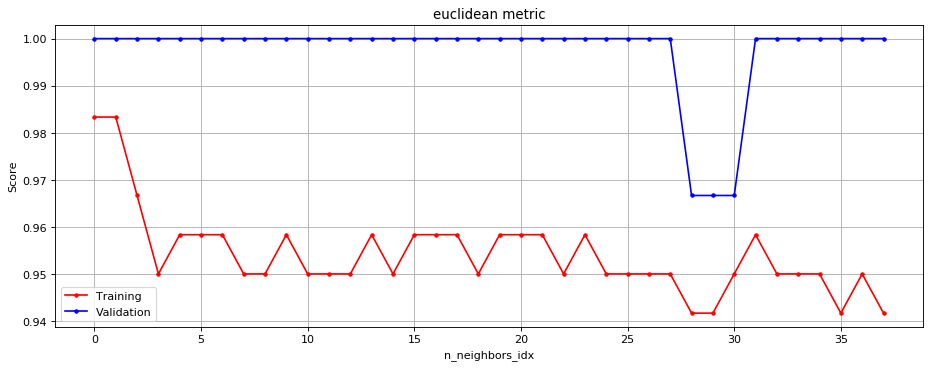

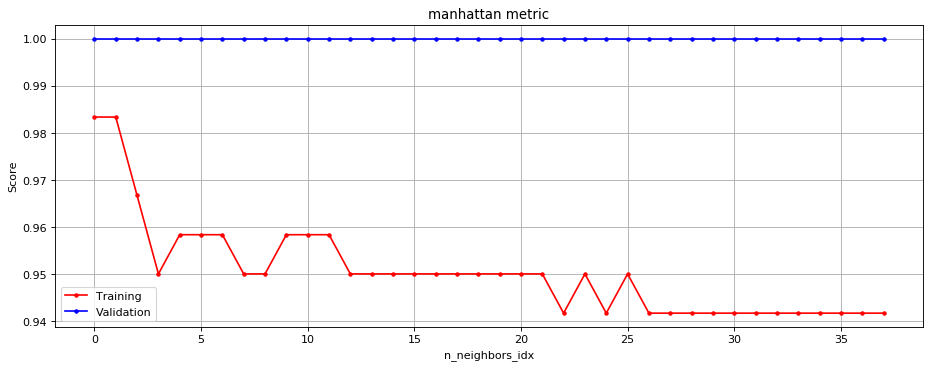

In [11]:
############
metric ='cosine' # Algunas opciones: cosine, euclidean, manhattan.
model_spec=KNeighborsClassifier(n_neighbors=1, metric=metric)
var_target_name='n_neighbors'; var_target_vec=list(np.arange(2,40,1))
var_target_name_aux=var_target_name; var_target_vec_aux=var_target_vec

kn_dict_cosine,list_n_neighbors=acc_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

# Graficamos los errores    
xo_array=np.array(list_n_neighbors)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,1],xo_array[:,2],'.-r',xo_array[:,1],xo_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('n_neighbors_idx')
plt.ylabel('Score')
plt.title('cosine metric')
plt.legend(['Training','Validation'])
plt.show()

############
# metric
n_neighbors_vec=list(np.arange(2,40,1))
metric ='euclidean' # Algunas opciones: cosine, euclidean, manhattan.

model_spec=KNeighborsClassifier(n_neighbors=1, metric=metric)
var_target_name='n_neighbors'; var_target_vec=list(np.arange(2,40,1))
var_target_name_aux=var_target_name; var_target_vec_aux=var_target_vec

kn_dict_euclidean,list_n_neighbors=acc_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)

# Graficamos los errores    
xo_array=np.array(list_n_neighbors)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,1],xo_array[:,2],'.-r',xo_array[:,1],xo_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('n_neighbors_idx')
plt.ylabel('Score')
plt.title('euclidean metric')
plt.legend(['Training','Validation'])
plt.show()

############
# metric
metric ='manhattan' # Algunas opciones: cosine, euclidean, manhattan.
model_spec=KNeighborsClassifier(n_neighbors=1, metric=metric)
var_target_name='n_neighbors'; var_target_vec=list(np.arange(2,40,1))
var_target_name_aux=var_target_name; var_target_vec_aux=var_target_vec

kn_dict_manhattan,list_n_neighbors=acc_model_par(model_spec,X_train_feature,y_train,X_val_feature,y_val,
                  var_target_name,var_target_vec,
                  var_target_name_aux,var_target_vec_aux)
    
# Graficamos los errores    
xo_array=np.array(list_n_neighbors)
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xo_array[:,1],xo_array[:,2],'.-r',xo_array[:,1],xo_array[:,3],'.-b')
plt.grid(True)
plt.xlabel('n_neighbors_idx')
plt.ylabel('Score')
plt.title('manhattan metric')
plt.legend(['Training','Validation'])
plt.show()

#### Matriz de confusión

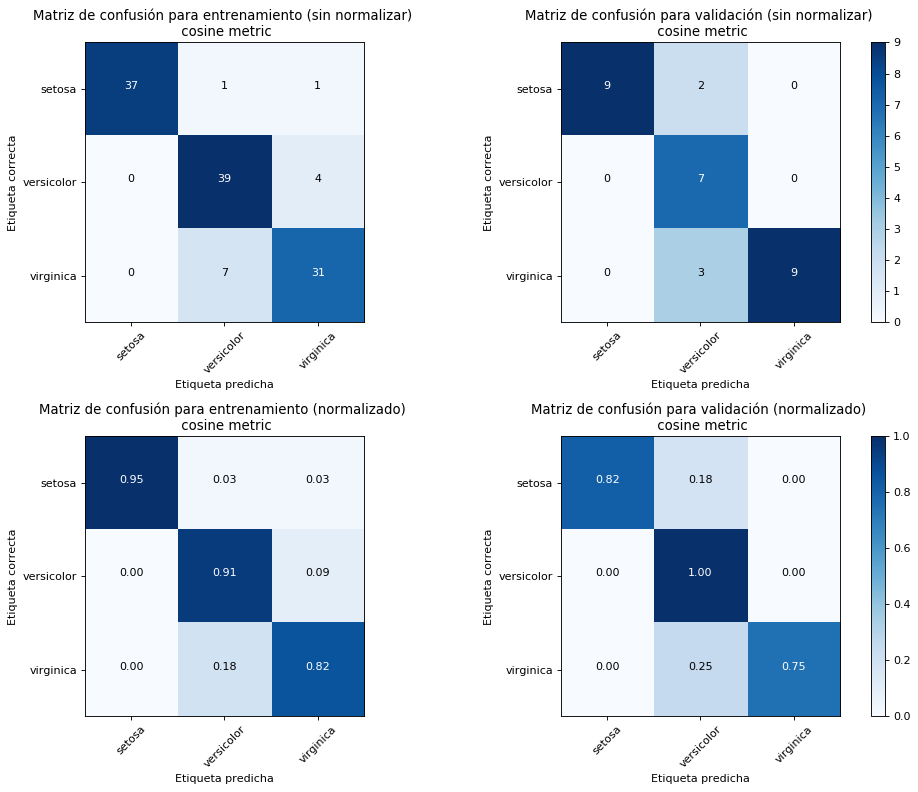

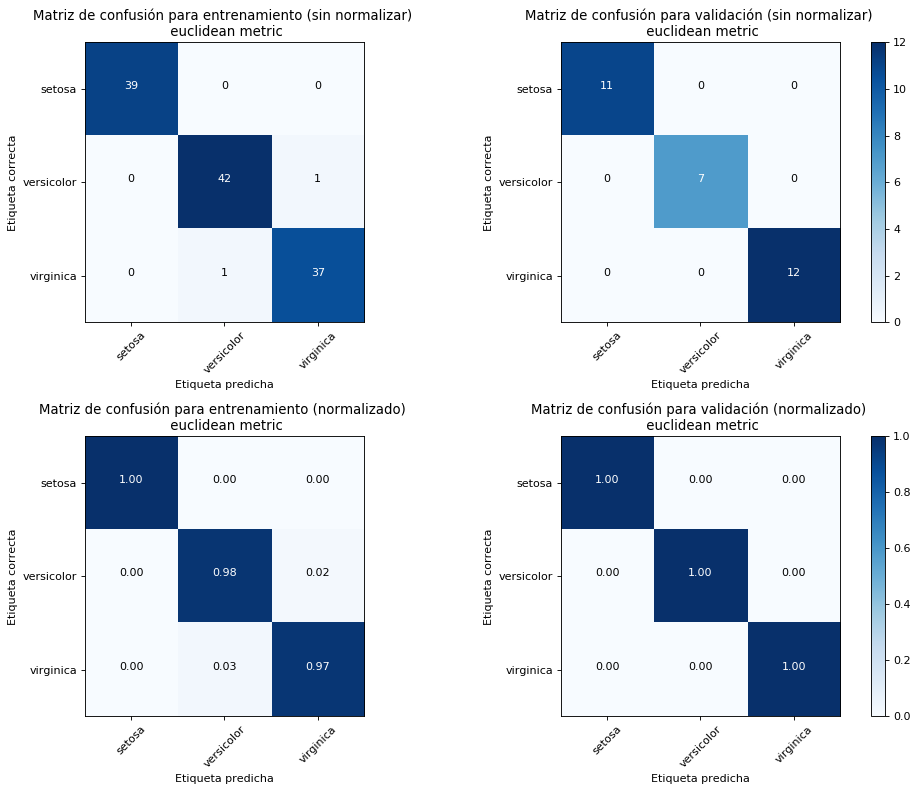

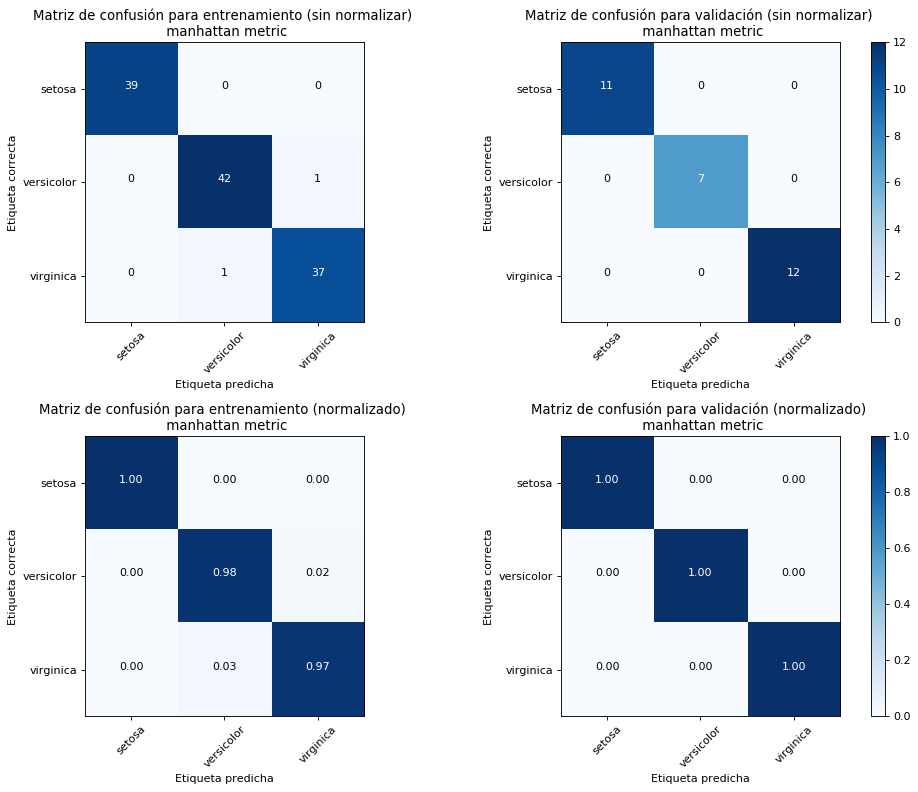

In [13]:
# cosine
model=kn_dict_cosine['n_neighbors_idx_1']['model']
mat_conf_plt(iris_data,model,X_train_feature,y_train,X_val_feature,y_val,[' \n cosine metric',' \n cosine metric',' \n cosine metric',' \n cosine metric'])

# euclidean 
model=kn_dict_euclidean['n_neighbors_idx_1']['model']
mat_conf_plt(iris_data,model,X_train_feature,y_train,X_val_feature,y_val,[' \n euclidean metric',' \n euclidean metric',' \n euclidean metric',' \n euclidean metric'])

# manhattan
model=kn_dict_manhattan['n_neighbors_idx_1']['model']
mat_conf_plt(iris_data,model,X_train_feature,y_train,X_val_feature,y_val,[' \n manhattan metric',' \n manhattan metric',' \n manhattan metric',' \n manhattan metric'])


#### Visualización de la frontera de decisión

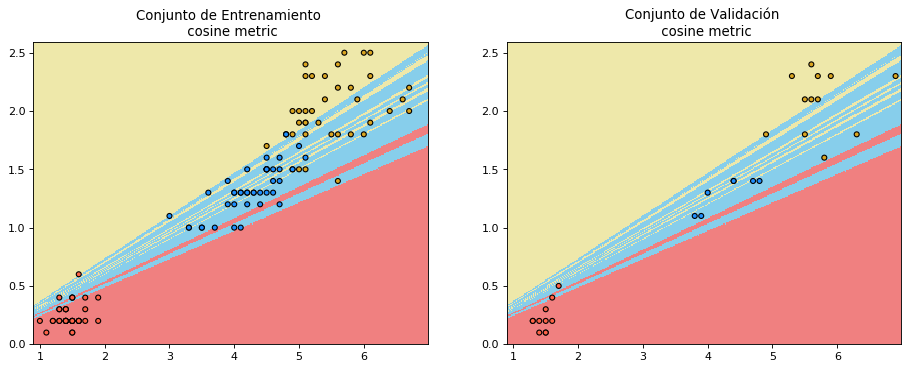

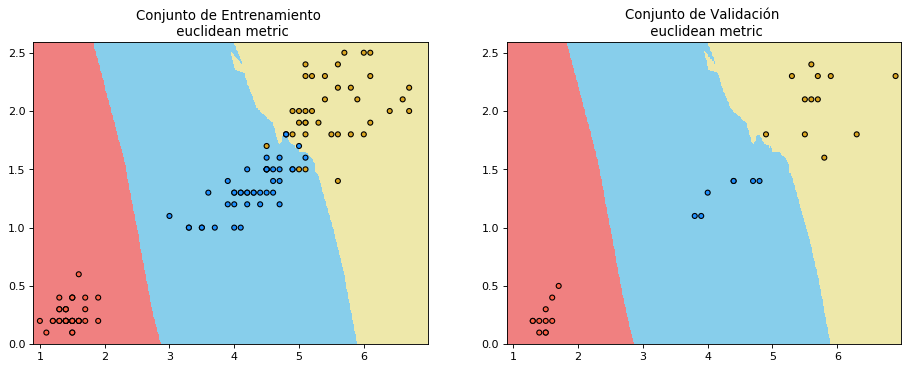

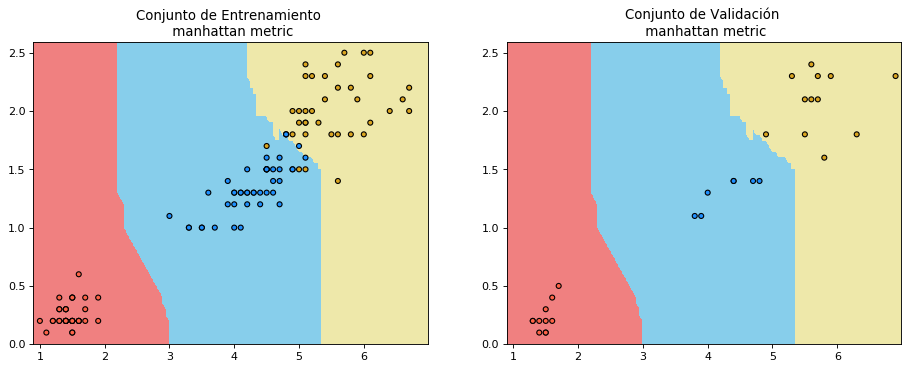

In [14]:
# Visualizamos las fonteras de desicion
cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

# cosine
model=kn_dict_cosine['n_neighbors_idx_1']['model']
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,[' \n cosine metric',' \n cosine metric'])

# euclidean
model=kn_dict_euclidean['n_neighbors_idx_4']['model']    
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,[' \n euclidean metric',' \n euclidean metric'])

# manhattan
model=kn_dict_manhattan['n_neighbors_idx_4']['model']    
boundary_plt(model,X_train_feature,X_val_feature,y_train,y_val,cmap_back,cmap_dots,[' \n manhattan metric',' \n manhattan metric'])

La metrica euclidea y la manhatan parecen realizar mejores separaciones de dominio.